In [2]:
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
 corr=df.corr()
 corr.style.background_gradient(cmap ='summer')

/usr/local/lib64/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
Unnamed: 0,1,0.898253,0.898986,0.898028,0.89851,-0.210944,0.906781,0.907413,0.906678,0.9071,-0.210944,0.0255106,nan
close,0.898253,1,0.999446,0.999473,0.99907,-0.139941,0.99971,0.999118,0.999276,0.998848,-0.139941,0.0319295,nan
high,0.898986,0.999446,1,0.999146,0.999503,-0.124726,0.999251,0.999714,0.999033,0.999328,-0.124726,0.0311998,nan
low,0.898028,0.999473,0.999146,1,0.999488,-0.152665,0.999135,0.998759,0.999703,0.999171,-0.152665,0.0319222,nan
open,0.89851,0.99907,0.999503,0.999488,1,-0.138214,0.998801,0.999148,0.999265,0.999706,-0.138214,0.0328333,nan
volume,-0.210944,-0.139941,-0.124726,-0.152665,-0.138214,1,-0.141219,-0.126855,-0.15323,-0.13963,1,-0.0170232,nan
adjClose,0.906781,0.99971,0.999251,0.999135,0.998801,-0.141219,1,0.999497,0.999522,0.99916,-0.141219,0.0325589,nan
adjHigh,0.907413,0.999118,0.999714,0.998759,0.999148,-0.126855,0.999497,1,0.999226,0.999551,-0.126855,0.0318441,nan
adjLow,0.906678,0.999276,0.999033,0.999703,0.999265,-0.15323,0.999522,0.999226,1,0.999538,-0.15323,0.03256,nan
adjOpen,0.9071,0.998848,0.999328,0.999171,0.999706,-0.13963,0.99916,0.999551,0.999538,1,-0.13963,0.0334015,nan


In [4]:
df1=df.reset_index()['high']
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

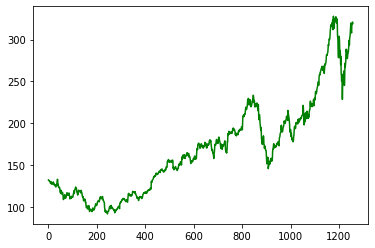

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1,color='g')#,marker='o',markerfacecolor='R')


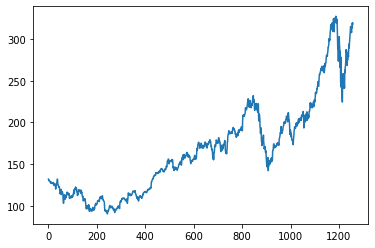

In [6]:
df2=df['close']
plt.plot(df2)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
import numpy as np
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size


(817, 441)

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size


(817, 441)

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 17s 24ms/sample - loss: 0.0147 - val_loss: 0.0768
Epoch 2/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0038 - val_loss: 0.0044
Epoch 3/100
716/716 [==============================] - 5s 8ms/sample - loss: 0.0011 - val_loss: 0.0070
Epoch 4/100
716/716 [==============================] - 5s 8ms/sample - loss: 9.3673e-04 - val_loss: 0.0038
Epoch 5/100
716/716 [==============================] - 5s 7ms/sample - loss: 7.9955e-04 - val_loss: 0.0066
Epoch 6/100
716/716 [==============================] - 5s 8ms/sample - loss: 6.5590e-04 - val_loss: 0.0078
Epoch 7/100
716/716 [==============================] - 5s 7ms/sample - loss: 7.3926e-04 - val_loss: 0.0057
Epoch 8/100
716/716 [==============================] - 5s 8ms/sample - loss: 6.2354e-04 - val_loss: 0.0052
Epoch 9/100
716/716 [==============================] - 5s 7ms/sample - loss: 5.9705e-04 - val_loss: 0.0046
E

In [21]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
from math import *

from sklearn.metrics import mean_squared_error,r2_score
print("R2_Score:",r2_score(y_train,train_predict))
print("MSE:",mean_squared_error(y_train,train_predict))
rmse = sqrt(mean_squared_error(y_train,train_predict))
print("RMSE:",rmse)

R2_Score: 0.9882778088290813
MSE: 0.00022152987303134742
RMSE: 0.014883879636416958


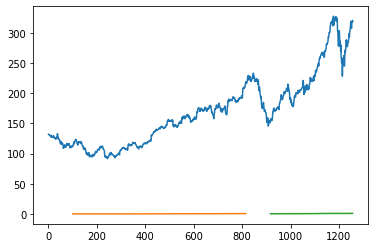

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [29]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.932514]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.90

In [30]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

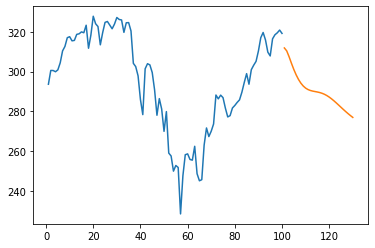

In [31]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

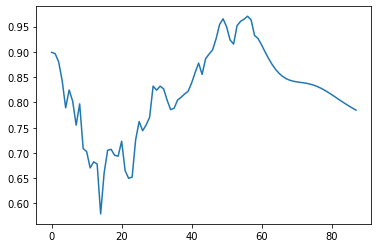

In [32]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

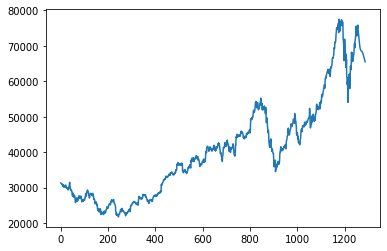

In [34]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)